<a href="https://colab.research.google.com/github/shravan2650/LeetCode-Preparation/blob/main/Coding_prep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Two sum**

Given an array of integers nums and an integer target, return indices of the two numbers such that they add up to target.

In [ ]:
class Solution:
    def twoSum(self, nums: List[int], target: int) -> List[int]:
        
        for count,val in enumerate(nums):
            x = target-val
            if x in nums[count+1:]:
                return [count,nums[count+1:].index(x)+count+1]

**2. Add Two Numbers**

You are given two non-empty linked lists representing two non-negative integers. The digits are stored in reverse order, and each of their nodes contains a single digit. Add the two numbers and return the sum as a linked list

Input: l1 = [2,4,3], l2 = [5,6,4]
Output: [7,0,8]
Explanation: 342 + 465 = 807.

In [ ]:
class Solution:
    def addTwoNumbers(self, l1, l2):
        def toint(node):
            return node.val + 10 * toint(node.next) if node else 0
        def tolist(n):
            node = ListNode(n % 10)
            if n > 9:
                node.next = tolist(n / 10)
            return node
        return tolist(toint(l1) + toint(l2))

In [ ]:
# Better

def addTwoNumbers(self, l1, l2):
    dummy = cur = ListNode(0)
    carry = 0
    while l1 or l2 or carry:
        if l1:
            carry += l1.val
            l1 = l1.next
        if l2:
            carry += l2.val
            l2 = l2.next
        cur.next = ListNode(carry%10)
        cur = cur.next
        carry //= 10
    return dummy.next

**3. Longest Substring Without Repeating Characters**

Given a string s, find the length of the longest substring without repeating characters.

 

In [ ]:
class Solution:
    def lengthOfLongestSubstring(self, s: str) -> int:
        d = {}
        l = 0
        start = 0
        for i,w in enumerate(s):
            if w in d and start<=d[w]:
                l = max(l,i-start)
                start = d[w]+1
            d[w]=i
        return max(l,len(s)-start)

**4. Median of Two Sorted Arrays**

Given two sorted arrays nums1 and nums2 of size m and n respectively, return the median of the two sorted arrays.

In [ ]:
class Solution:
    def findMedianSortedArrays(self, nums1: List[int], nums2: List[int]) -> float:
        
        i=0
        j=0
        k=0
        out = []
        while (i<len(nums1) & j<len(nums2)):
            if nums1[i]<nums2[j]:
                out.append(nums1[i])
                i+=1
            if nums1[i]>nums2[j]:
                out.append(nums2[j])
                j+=1
            k+=1
        while i<len(nums1):
            out.append(nums1[i])
            i+=1
        while j<len(nums2):
            out.append(nums2[j])
            j+=1
        
        return median(out)

**6. Zigzag Conversion**

The string "PAYPALISHIRING" is written in a zigzag pattern on a given number of rows like this: (you may want to display this pattern in a fixed font for better legibility)

P   A   H   N
A P L S I I G
Y   I   R

And then read line by line: "PAHNAPLSIIGYIR"

In [ ]:
class Solution:
    def convert(self, s: str, numRows: int) -> str:
        if numRows <=1: return s
        rows=['']*numRows
        pos, step = 0,1
        
        for ch in s:
            rows[pos]+=ch
            if pos==numRows-1:
                step = -1
            if pos==0:
                step = 1
            pos +=step
        
        return ''.join(rows)

**7. Reverse Integer**

Given a signed 32-bit integer x, return x with its digits reversed. If reversing x causes the value to go outside the signed 32-bit integer range [-2^31, 2^31 - 1], then return 0.

In [ ]:
class Solution:
    def reverse(self, x: int) -> int:
        if x==0:
            return x

        
        sign = int(x/abs(x))
        x = abs(x)
        
        reverse = 0
        pop = 0 
        
        while x>0:
            pop = x%10
            x = x//10
            reverse = reverse*10+pop
        
        reverse *=sign
        if reverse<-2**31 or reverse>2**31-1:
            return 0
        else:
            return reverse

**9. Palindrome Number**



In [ ]:
class Solution:
    def isPalindrome(self, x: int) -> bool:
        # 0 is pal
        if x==0:
            return True
        
        # Should not end with zero or negative
        if x<0 or x%10 ==0:
            return False
        
        reverse = 0
        pop = 0
        
        # check till half
        while x>reverse:
            pop = x%10
            x = x//10
            
            reverse = reverse*10+pop

        # check for even and odd number of digits   
        if x==reverse or x==reverse//10:
            return True
        else:
            return False
            

**11. Container With Most Water**

You are given an integer array height of length n. There are n vertical lines drawn such that the two endpoints of the ith line are (i, 0) and (i, height[i]).

Find two lines that together with the x-axis form a container, such that the container contains the most water.

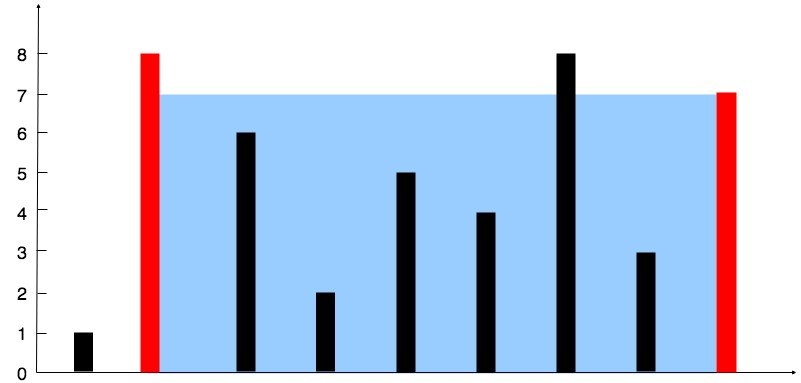

In [ ]:
class Solution:
    def maxArea(self, height: List[int]) -> int:
        maxA = 0
        n = len(height)
        l = 0
        r = n-1
        
        while l<r:
            maxA = max(maxA,(r-l)*min(height[l],height[r]))
            if height[l]<height[r]:
                l+=1
            else:
                r-=1 
        return maxA

**13. Roman to Integer**

Roman numerals are usually written largest to smallest from left to right. However, the numeral for four is not IIII. Instead, the number four is written as IV. Because the one is before the five we subtract it making four. The same principle applies to the number nine, which is written as IX. There are six instances where subtraction is used:

In [ ]:
class Solution:
    def romanToInt(self, s: str) -> int:
        d_n = {"I":1,"V":5,"X":10,"L":50,"C":100,"D":500,"M":1000}
        d = {}
        num = 0
        
        for i in range(len(s)-1):
            if  d_n[s[i+1]]<=d_n[s[i]]:
                num+=d_n[s[i]]
            else:
                num-=d_n[s[i]]
        return num + d_n[s[-1]]

**15. 3Sum**

Given an integer array nums, return all the triplets [nums[i], nums[j], nums[k]] such that i != j, i != k, and j != k, and nums[i] + nums[j] + nums[k] == 0.

Notice that the solution set must not contain duplicate triplets.

Notes:

The way to think about it is since it's 3 sum, there's only going to be 3 numbers. So to find the combinations of 3 numbers, he is iterating through the list with the first pointer, and then trying to find two extra numbers to sum to 0. Since the list is ordered, the right pointer will always be higher than the middle pointer. So if the sum is too large, you can move the right pointer back one. On the other hand, if the sum is too small (below 0), then move the middle pointer up one.

1. len(nums)-2 is because we need at least 3 numbers to continue.

2. if i > 0 and nums[i] == nums[i-1] is because when i = 0, it doesn't need to check if it's a duplicate element since it doesn't even have a previous element to compare with. And nums[i] == nums[i-1] is to prevent checking duplicate again. (This seems to be a good pattern which has been seen in other questions as well).

In [ ]:
class Solution:
    def threeSum(self, nums: List[int]) -> List[List[int]]:
        res = []
        nums.sort()
        for i in range(len(nums)-2):
            if i>0 and nums[i]==nums[i-1]:
                continue
            l,r = i+1,len(nums)-1
            while l<r:
                s = nums[i]+nums[l]+nums[r]
                if s>0:
                    r-=1
                elif s<0:
                    l+=1
                else:
                    res.append([nums[i],nums[l],nums[r]])
                    while l<r and nums[l]==nums[l+1]:
                        l+=1
                    while l<r and nums[r]==nums[r-1]:
                        r-=1  
                    l+=1
                    r-=1
        return res

**20. Valid Parentheses**

Given a string s containing just the characters '(', ')', '{', '}', '[' and ']', determine if the input string is valid.

An input string is valid if:

Open brackets must be closed by the same type of brackets.

Open brackets must be closed in the correct order.

In [ ]:
class Solution:
    def isValid(self, s):
        stack = [0]
        mapping = {0:None,'(':')', '[':']', '{':'}'}
        for c in s:
            if c in mapping: 
                stack.append(c)
            else:
                if mapping[stack.pop()] != c: return False
        return stack == [0]

**26. Remove Duplicates from Sorted Array**

Given an integer array nums sorted in non-decreasing order, remove the duplicates in-place such that each unique element appears only once. The relative order of the elements should be kept the same.

Since it is impossible to change the length of the array in some languages, you must instead have the result be placed in the first part of the array nums. More formally, if there are k elements after removing the duplicates, then the first k elements of nums should hold the final result. It does not matter what you leave beyond the first k elements.

Return k after placing the final result in the first k slots of nums.

In [ ]:
class Solution:
    def removeDuplicates(self, nums: List[int]) -> int:
        d = {}
        k = 0
        for n in nums:
            if n not in d:
                d[n]=1
                nums[k]=n
                k+=1
        return k

**27. Remove Element**

Given an integer array nums and an integer val, remove all occurrences of val in nums in-place. The relative order of the elements may be changed.

Since it is impossible to change the length of the array in some languages, you must instead have the result be placed in the first part of the array nums. More formally, if there are k elements after removing the duplicates, then the first k elements of nums should hold the final result. It does not matter what you leave beyond the first k elements.

Return k after placing the final result in the first k slots of nums.

In [ ]:
class Solution:
    def removeElement(self, nums: List[int], val: int) -> int:
        k=0
        for n in nums:
            if n!=val:
                nums[k] = n
                k+=1
        return k

**35. Search Insert Position**

Given a sorted array of distinct integers and a target value, return the index if the target is found. If not, return the index where it would be if it were inserted in order.

In [ ]:
class Solution:
    def searchInsert(self, nums: List[int], target: int) -> int:
        l,r = 0, len(nums)-1
        while l<=r:
            m = (l+r)//2
            if nums[m] ==target:
                return m
            m = (l+r)//2
            if nums[m]<target:
                l = m+1
            else:
                r = m-1                        
        return l

**45. Jump Game II**

Given an array of non-negative integers nums, you are initially positioned at the first index of the array.

Each element in the array represents your maximum jump length at that position.

Your goal is to reach the last index in the minimum number of jumps.

You can assume that you can always reach the last index.

https://www.youtube.com/watch?v=dJ7sWiOoK7g&t=10s&ab_channel=NeetCode



In [ ]:
class Solution:
    def jump(self, nums: List[int]) -> int:
        l=r=0
        res = 0
        
        while r<len(nums)-1:
            farthest = 0
            for i in range(l,r+1):
                farthest = max(farthest,i+nums[i])
            l=r+1
            r=farthest
            res+=1
        return res

**49. Group Anagrams**

Given an array of strings strs, group the anagrams together. You can return the answer in any order.

An Anagram is a word or phrase formed by rearranging the letters of a different word or phrase, typically using all the original letters exactly once.

In [ ]:
class Solution:
    def groupAnagrams(self, strs: List[str]) -> List[List[str]]:
        d = {}
        for w in strs:
            key = tuple(sorted(w))
            d[key]=d.get(key,[])+[w]
        return d.values()

**55. Jump Game**

You are given an integer array nums. You are initially positioned at the array's first index, and each element in the array represents your maximum jump length at that position.

Return true if you can reach the last index, or false otherwise.

In [ ]:
class Solution:
    def canJump(self, nums: List[int]) -> bool:
        goal = len(nums)-1
        
        for i in range(len(nums)-1,-1,-1):
            if i+nums[i]>=goal:
                goal = i
        
        return True if goal==0 else False

**56. Merge Intervals**

Given an array of intervals where intervals[i] = [starti, endi], merge all overlapping intervals, and return an array of the non-overlapping intervals that cover all the intervals in the input.

In [ ]:
class Solution:
    def merge(self, intervals: List[List[int]]) -> List[List[int]]:
        intervals=sorted(intervals, key = lambda x:x[0])
        res =[intervals[0]]
        for n in intervals[1:]:
            if n[0]<=res[-1][1]:
                res[-1][1] = max(res[-1][1], n[1])
            else:
                res.append(n)
        return res

**98. Validate Binary Search Tree**

Given the root of a binary tree, determine if it is a valid binary search tree (BST).

A valid BST is defined as follows:

The left subtree of a node contains only nodes with keys less than the node's key.
The right subtree of a node contains only nodes with keys greater than the node's key.
Both the left and right subtrees must also be binary search trees.

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def isValidBST(self, root: Optional[TreeNode]) -> bool:
        
        def valid(node, l,r):
            if not node:
                return True
            if not(node.val>l and node.val<r):
                return False
            return valid(node.left,l,node.val) and valid(node.right,node.val,r)
        
        return valid(root,float("-inf"),float("inf"))

**121. Best Time to Buy and Sell Stock**

You are given an array prices where prices[i] is the price of a given stock on the ith day.

You want to maximize your profit by choosing a single day to buy one stock and choosing a different day in the future to sell that stock.

Return the maximum profit you can achieve from this transaction. If you cannot achieve any profit, return 0.

In [ ]:
class Solution:
    def maxProfit(self, prices: List[int]) -> int:
        maxp = 0
        m = float('inf')
        
        for p in prices:
            if p<m: m = p
            if p-m>maxp: maxp = p-m
        return maxp

**153. Find Minimum in Rotated Sorted Array**

Suppose an array of length n sorted in ascending order is rotated between 1 and n times. For example, the array nums = [0,1,2,4,5,6,7] might become:

[4,5,6,7,0,1,2] if it was rotated 4 times.
[0,1,2,4,5,6,7] if it was rotated 7 times.
Notice that rotating an array [a[0], a[1], a[2], ..., a[n-1]] 1 time results in the array [a[n-1], a[0], a[1], a[2], ..., a[n-2]].

Given the sorted rotated array nums of unique elements, return the minimum element of this array.

You must write an algorithm that runs in O(log n) time.

In [ ]:
class Solution:
    def findMin(self, nums: List[int]) -> int:
        l,r = 0, len(nums)-1
        while l<r:
            mid = (l+r)//2
            if nums[mid]>nums[r]:
                l = mid+1
            else:
                r = mid
                
        return nums[l]

**178 · Graph Valid Tree**

Given n nodes labeled from 0 to n - 1 and a list of undirected edges (each edge is a pair of nodes), write a function to check whether these edges make up a valid tree.

In [ ]:
class Solution:
    """
    @param n: An integer
    @param edges: a list of undirected edges
    @return: true if it's a valid tree, or false
    """
    def validTree(self, n, edges):
        # write your code here
        adj = {i:[] for i in range(n)}

        for n1,n2 in edges:
            adj[n1].append(n2)
            adj[n2].append(n1)
        
        visited = set()

        def dfs(i, prev):
            if i in visited:
                return False
            visited.add(i)
            for j in adj[i]:
                if j==prev:
                    continue
                if not dfs(j,i):
                    return False
            return True

        return dfs(0,-1) and len(visited)==n


**200. Number of Islands**

Given an m x n 2D binary grid grid which represents a map of '1's (land) and '0's (water), return the number of islands.

An island is surrounded by water and is formed by connecting adjacent lands horizontally or vertically. You may assume all four edges of the grid are all surrounded by water.



In [ ]:
class Solution:
    def numIslands(self, grid: List[List[str]]) -> int:
        count = 0
        for i in range(len(grid)):
            for j in range(len(grid[0])):
                if grid[i][j]=="1":
                    self.search(i,j,grid)
                    count+=1
        
        return count
    
    def search(self, i,j, grid: List[List[str]]):
        if(i<0 or j<0 or i>len(grid)-1 or j>len(grid[0])-1 or grid[i][j]!="1"):
            return
        grid[i][j]="2"
        self.search(i+1,j,grid)
        self.search(i-1,j,grid)
        self.search(i,j+1,grid)
        self.search(i,j-1,grid)

**206. Reverse Linked List**

Given the head of a singly linked list, reverse the list, and return the reversed list.

In [ ]:
# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, val=0, next=None):
#         self.val = val
#         self.next = next
class Solution:
    def reverseList(self, head: Optional[ListNode]) -> Optional[ListNode]:
        cur, prev = head, None
        while cur:
            cur.next, prev, cur = prev, cur, cur.next
        return prev

**217. Contains Duplicate**

Given an integer array nums, return true if any value appears at least twice in the array, and return false if every element is distinct.

In [ ]:
class Solution:
    def containsDuplicate(self, nums: List[int]) -> bool:
        d = {}
        for n in nums:
            if n in d:
                return True
            else:
                d[n]=1
        return False

**221. Maximal Square**

Given an m x n binary matrix filled with 0's and 1's, find the largest square containing only 1's and return its area.

https://www.youtube.com/watch?v=6X7Ha2PrDmM&ab_channel=NeetCode

In [ ]:
class Solution:
    def maximalSquare(self, matrix: List[List[str]]) -> int:
        m = len(matrix)
        n = len(matrix[0])
        sides = {}
        
        def findsides(i,j):
            if i>=m or j>=n:
                return 0
            
            if (i,j) not in sides:
                down = findsides(i+1,j)
                diag = findsides(i+1,j+1)
                right = findsides(i,j+1)
                
                sides[(i,j)]=0
                if matrix[i][j]=="1":
                    sides[(i,j)] = 1 + min(down,diag,right)
            return sides[(i,j)]
        
        findsides(0,0)
        return max(sides.values())**2

**226. Invert Binary Tree**

Given the root of a binary tree, invert the tree, and return its root.

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def invertTree(self, root: Optional[TreeNode]) -> Optional[TreeNode]:
        if not root:
            return
        root.left,root.right = self.invertTree(root.right), self.invertTree(root.left)
        
        return root

**238. Product of Array Except Self**

Given an integer array nums, return an array answer such that answer[i] is equal to the product of all the elements of nums except nums[i].

The product of any prefix or suffix of nums is guaranteed to fit in a 32-bit integer.

You must write an algorithm that runs in O(n) time and without using the division operation.

In [ ]:
class Solution:
    def productExceptSelf(self, nums: List[int]) -> List[int]:
        p=1
        out = []
        
        for n in nums:
            out.append(p)
            p*=n
        p=1
        for i in range(len(nums)-1,-1,-1):
            out[i]*=p
            p*=nums[i]
        return out

**242. Valid Anagram**

Given two strings s and t, return true if t is an anagram of s, and false otherwise.

An Anagram is a word or phrase formed by rearranging the letters of a different word or phrase, typically using all the original letters exactly once.

In [ ]:
class Solution:
    def isAnagram(self, s: str, t: str) -> bool:
        return sorted(s)==sorted(t)